<a href="https://colab.research.google.com/github/Air-pollution-and-COVID-19/CDMX/blob/master/Contaminantes_CDMX_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # Load the numpy library
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, num2date, datetime
from matplotlib import rcParams as rcp

In [3]:
rcp['font.size'] = 15.
rcp['lines.linewidth'] = 2.
rcp['font.family'] = 'sans'

In [4]:
!git clone https://github.com/cdcmx2020a/group_A_AlmaJair.git

Cloning into 'group_A_AlmaJair'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (227/227), done.
remote: Total 297 (delta 114), reused 215 (delta 65), pack-reused 0
Receiving objects: 100% (297/297), 43.24 MiB | 27.47 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [5]:
# Obtener casos diarios Tijuana AUN O SE HACE con cdmx
mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/casos_diarios_mty.csv',delimiter=',') # Baja California is 2

In [6]:
# Date of city AUN NO SE HACE con cdmx
time = mat[0,:]
str(mat[0,0]) # dia , mes y año

'12012020.0'

In [7]:
cases_ciudad = mat[1,:] # number of cases in city

In [8]:
# Loads time mm,dd,yyyy HH,mm
time_final_ct = np.zeros(time.shape[0])
for ii in range(time.shape[0]):
    if np.ma.is_masked(time[ii]) == False:
        if len(str(time[ii])) == 10:
            time_final_ct[ii] = date2num(datetime.datetime(np.int(str(time[ii])[4:-2]), np.int(str(time[ii])[2:4]), np.int(str(time[ii])[0:2])))
        else:
            time_final_ct[ii] = date2num(datetime.datetime(np.int(str(time[ii])[3:-2]), np.int(str(time[ii])[1:3]),
                                                            np.int(str(time[ii])[0:1])))
                
                

In [9]:
# https://en.climate-data.org/north-america/mexico/lower-california/tijuana-1005196/#temperature-graph
temp_mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/temp_diaria_2020_cdmx.csv', delimiter=',')

In [10]:
temp_mean = temp_mat[:,3] # graba la variable temp mean que esta en la columna 4
temp_min = temp_mat[:,4] # graba la variable temp min que es columna 5
temp_max = temp_mat[:,5] # graba la variable temp max que es columna 6 (python empieza en 0)

In [11]:
year = temp_mat[:,0] # columna 0 es el año
month = temp_mat[:,1] # columna 1 es el mes
day = temp_mat[:,2] # columna 2 es el dia
time_final_temp = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time_final_temp[ii] = date2num(datetime.datetime(np.int(year[ii]), np.int(month[ii]),
                         np.int(day[ii]))) # Lo convierte a formato Python en un loop renglon por renglon

No handles with labels found to put in legend.


Text(0, 0.5, 'Temperature $^oC$')

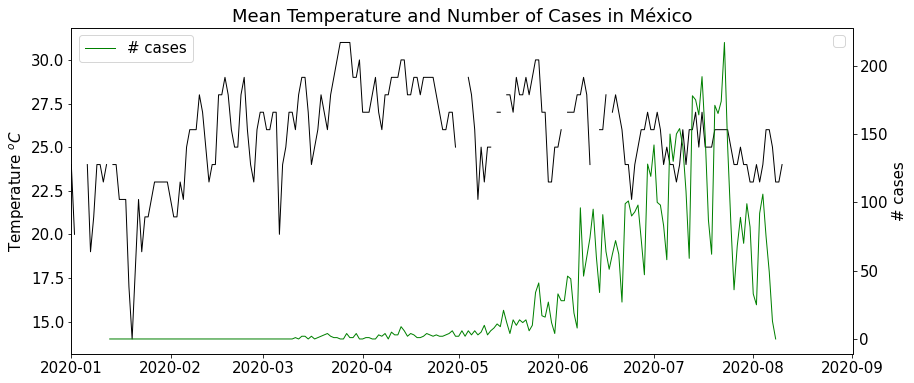

In [12]:
# intento de graficar temp con ozono
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6)) #FALTA HACERLO CON DATOS CDMX, corre con datos de tijuana
tit = 'Mean Temperature and Number of Cases in México'
ax1 = ax # eje de las y del lado izquiero se llama ax1
# label es para poner nombre a la linea que graficamos
# ax1.plot(num2date(time_final_temp), temp_mean, lw=1, color='m', label='temp')
# ax1.plot(num2date(time_final_temp), temp_min, lw=1, color='r')
ax1.plot(num2date(time_final_temp), temp_max, lw=1, color='k')
ax1.legend(loc=1) # pone el titulo de cada linea
ax2 = ax1.twinx() # eje de las y del lado derecho se llama ax2
ax2.plot(num2date(time_final_ct[1:]), cases_ciudad[1:], lw=1, color='g', label='# cases')
ax2.set_title(tit)
ax2.set_ylabel('# cases')
ax2.legend(loc=2) # pone el titulo de cada linea
#ax.set_ylim(0, 280)
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
ax2.set_xlim(fi1, fi2)
ax1.set_ylabel('Temperature $^oC$')
# plt.savefig('Figura_Estado_Monterrey_temp.png', bbox_inches='tight')

In [13]:
#contaminantes

In [14]:
mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/contaminantes_cdmx_2020.csv', delimiter=',') # Loads CDMX pollutant file

In [15]:
# Loads time mm,dd,yyyy HH,mm
month = mat[:, 1]
day = mat[:, 0]
year = mat[:, 2]
hour = mat[:, 3]
time = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time[ii] = date2num(datetime.datetime(np.int(year[ii] + 2000), np.int(month[ii]),
                         np.int(day[ii]), np.int(hour[ii])))

In [29]:
# This depends on the file
o3 = np.ma.masked_invalid(mat[:, 6]) # 03 ppb 10 para Cadereyta 7 para cdmx y  5 para centro
pm25 = np.ma.masked_invalid(mat[:, 5]) #  pm2.5 kg/m3 11 para Cadereyta 6 para cdmx y 7 para  centro
temp = np.ma.masked_invalid(mat[:, 7]) #temperature C 12 para Cadereyta 8 para cdmx y 8 para centro

In [30]:
#!less /content/group_A_AlmaJair/datos_covid/contaminantes_cdmx_2020.csv #duda

In [31]:
lin2 = np.int(np.floor((o3.shape[0]/24)))
lin = np.int(o3.shape[0] - lin2 * 24)

In [32]:
# Take daily Maximum
time_day = np.reshape(time[:-lin], (lin2, 24)).mean(1)
o3_day = np.reshape(o3[:-lin], (lin2, 24)) 
pm25_day = np.reshape(pm25[:-lin], (lin2, 24))

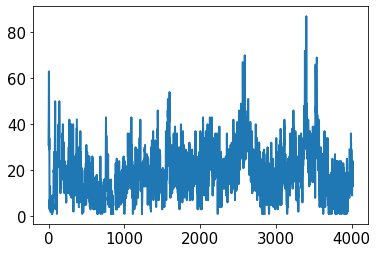

In [33]:
plt.plot(pm25)


In [34]:
# pm2.5 si tienes mas del 75% de los datos diarios se saca el promedio
# ozono si tienes mas del 75% de los datos diarios se saca el maximo diario

In [35]:
for ii in range(pm25_day.shape[0]):
   if (pm25_day[ii, ~pm25_day[ii, :].mask].size) < 18:
    pm25_day[ii, :] = np.ma.masked

In [36]:
for ii in range(o3_day.shape[0]):
  if (o3_day[ii, ~o3_day[ii, :].mask].size) < 18:
    o3_day[ii, :] = np.ma.masked
    print(ii)

43
61
126
144
145
146
147
167
168
169


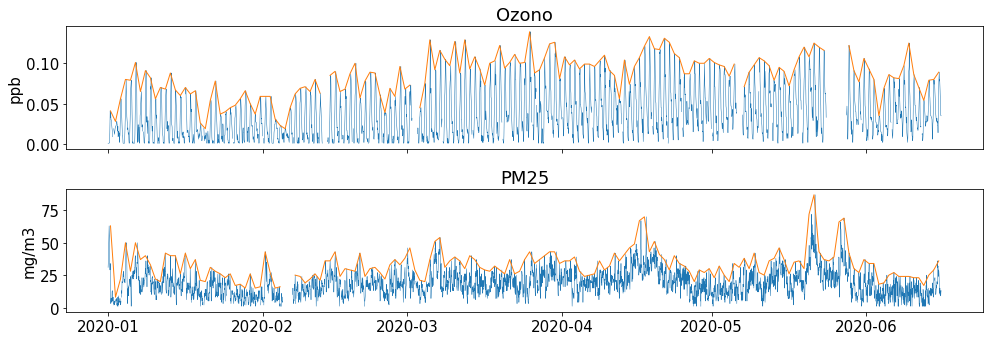

In [37]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14, 5))
ax = axs[0]
tit = 'Ozono'
units = 'ppb' #partes por mil millones 
ax.plot(num2date(time), o3, lw=0.5)
ax.plot(num2date(time_day), o3_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 1.5e-1)

ax = axs[1]
tit = 'PM25'
units = 'mg/m3'
ax.plot(num2date(time), pm25, lw=0.5)
ax.plot(num2date(time_day), pm25_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 80)

fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-06', '%Y-%m'))
# ax.set_xlim(fi1, fi2)
plt.tight_layout()
# plt.savefig('pollutants_raw.png', bbox_inches='tight')

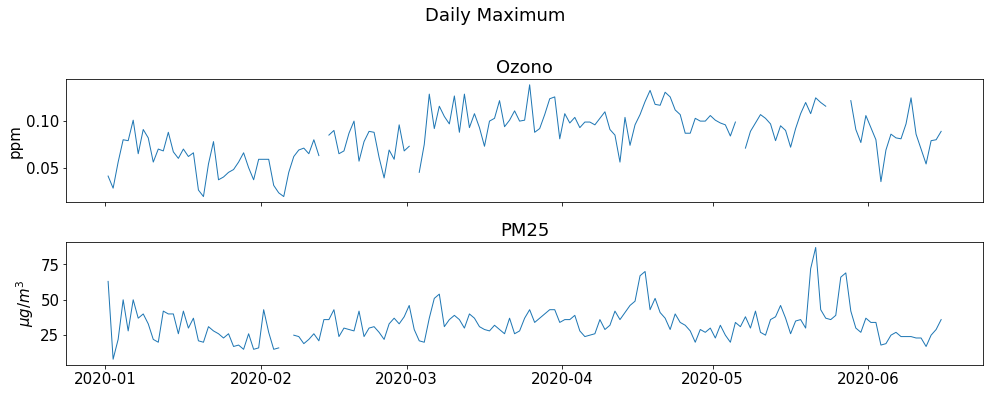

In [38]:
#daily maximum
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14, 5))
ax = axs[0]
tit = 'Ozono'
units = 'ppm'
ax.plot(num2date(time_day), o3_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 1.5e-1)

ax = axs[1]
tit = 'PM25'
units = '$\mu g/m^3$'
ax.plot(num2date(time_day), pm25_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 90)

# fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
 #fi2 = date2num(datetime.datetime.strptime('2020-06', '%Y-%m'))
 #ax.set_xlim(fi1, fi2)
fig.suptitle('Daily Maximum', y=1.1)
plt.tight_layout()
plt.savefig('daily_max_pollutants.png', bbox_inches='tight')

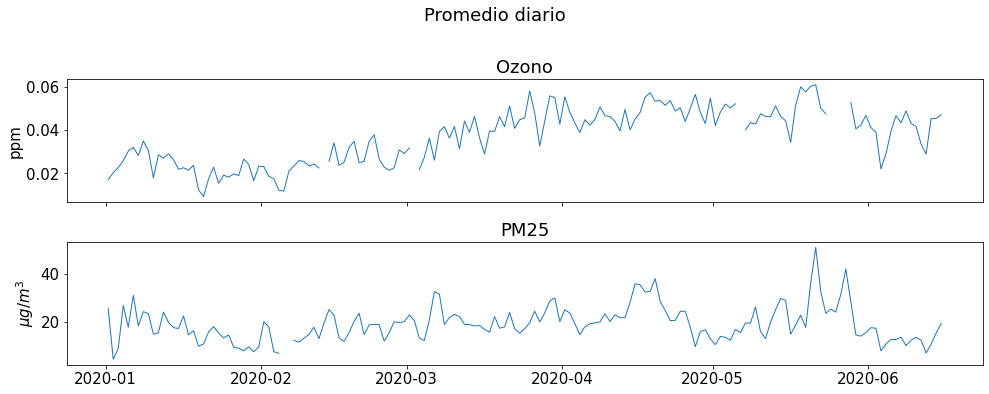

In [39]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14, 5))
ax = axs[0]
tit = 'Ozono'
units = 'ppm'
ax.plot(num2date(time_day), o3_day.mean(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 1.5e-1)

ax = axs[1]
tit = 'PM25'
units = '$\mu g/m^3$'
ax.plot(num2date(time_day), pm25_day.mean(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 90)

# fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
# fi2 = date2num(datetime.datetime.strptime('2020-06', '%Y-%m'))
# ax.set_xlim(fi1, fi2)
fig.suptitle('Promedio diario', y=1.1)
plt.tight_layout()
plt.savefig('daily_mean_pollutants.png', bbox_inches='tight')

Text(0, 0.5, 'PM2.5 $\\mu g/m^3$')

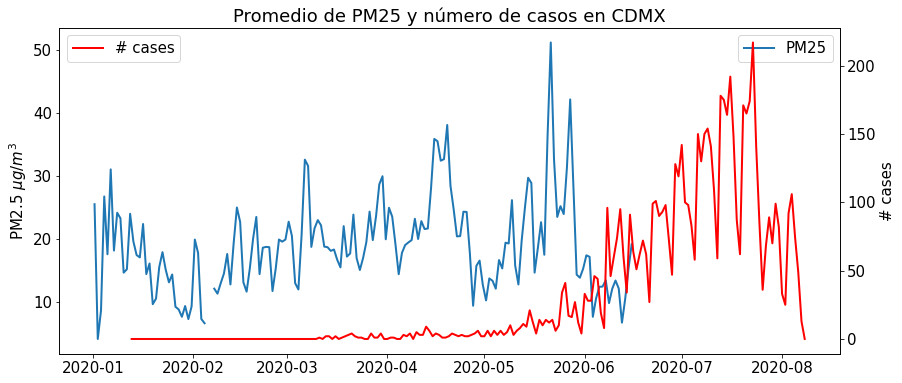

In [40]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Promedio de PM25 y número de casos en CDMX' #duda de usar pm2.5
ax1 = ax
ax1.plot(num2date(time_day), pm25_day.mean(1), lw=2, label = 'PM25')

ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(num2date(time_final_ct[1:]), cases_ciudad[1:], lw=2, color='r', label='# cases')
ax2.set_title(tit)
ax2.set_ylabel('# cases')
ax2.legend(loc=2)
#ax.set_ylim(0, 280)
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
# ax2.set_xlim(fi1, fi2)
ax1.set_ylabel('PM2.5 $\mu g/m^3$')
# plt.savefig('Figura_Estado_Baja_California.png', bbox_inches='tight')

Text(0, 0.5, 'Ozono $\\mu g/m^3$')

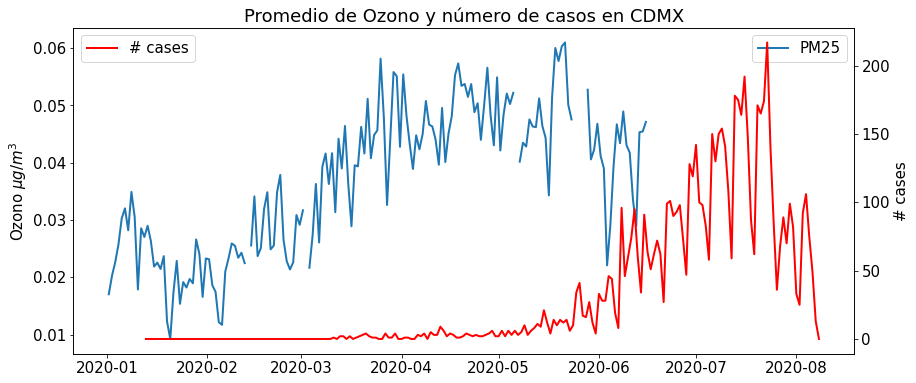

In [41]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Promedio de Ozono y número de casos en CDMX' #duda de usar pm2.5
ax1 = ax
ax1.plot(num2date(time_day), o3_day.mean(1), lw=2, label = 'PM25')

ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(num2date(time_final_ct[1:]), cases_ciudad[1:], lw=2, color='r', label='# cases')
ax2.set_title(tit)
ax2.set_ylabel('# cases')
ax2.legend(loc=2)
#ax.set_ylim(0, 280)
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
# ax2.set_xlim(fi1, fi2)
ax1.set_ylabel('Ozono $\mu g/m^3$')
# plt.savefig('Figura_Estado_Baja_California.png', bbox_inches='tight')